# Projeto: Previsão de Tipo de Personalidade MBTI
![Transtorno de Personalidade](https://irp.cdn-website.com/439be41a/dms3rep/multi/transtorno-de-personalidade-8382772f.jpg)
## 1. **Entendimento do Negócio**
### Objetivo:
Desenvolver um modelo de machine learning para prever o tipo de personalidade de uma pessoa baseado em fatores demográficos, áreas de interesse e pontuações de personalidade. O modelo será treinado em um conjunto de dados sintéticos que inclui mais de 100 mil amostras, representando indivíduos com diferentes características que contribuem para seu tipo de personalidade MBTI.

## 2. **Entendimento dos Dados**
### Descrição do Conjunto de Dados:
Este conjunto de dados foi criado para estudar a relação entre diferentes dimensões de personalidade e fatores como idade, gênero, educação e interesses. Ele contém as seguintes variáveis:

- **Idade:** Variável contínua que representa a idade do indivíduo.
- **Gênero:** Variável categórica ('Masculino', 'Feminino').
- **Educação:** Variável binária (1 = Pós-graduação ou superior, 0 = Graduação ou nível inferior).
- **Interesse:** Variável categórica representando a principal área de interesse.
- **Pontuação de Introversão:** Variável contínua (0 a 10), indicando uma tendência entre introversão e extroversão.
- **Pontuação de Sensing:** Variável contínua (0 a 10), indicando uma preferência entre sensoriamento e intuição.
- **Pontuação de Pensamento:** Variável contínua (0 a 10), indicando uma preferência entre pensar e sentir.
- **Pontuação de Julgamento:** Variável contínua (0 a 10), indicando uma preferência entre julgar e perceber.
- **Personalidade:** Tipo de personalidade MBTI (variável alvo).



In [167]:
import pandas as pd

df = pd.read_csv('data.csv')
display(df)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


In [3]:
# Renomear as colunas com o método rename()
df = df.rename(columns={
    'Age': 'Idade',
    'Gender': 'Gênero',
    'Education': 'Educação',
    'Introversion Score': 'Pontuação_Introversão',
    'Sensing Score': 'Pontuação_Sensing',
    'Thinking Score': 'Pontuação_Pensamento',
    'Judging Score': 'Pontuação_Julgamento',
    'Interest': 'Interesse',
    'Personality': 'Personalidade'
})

# Exibir as primeiras linhas para verificar a mudança
df.head()


,Idade,Gênero,Educação,Pontuação_Introversão,Pontuação_Sensing,Pontuação_Pensamento,Pontuação_Julgamento,Interesse,Personalidade
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Idade                  128061 non-null  float64
 1   Gênero                 128061 non-null  object 
 2   Educação               128061 non-null  int64  
 3   Pontuação_Introversão  128061 non-null  float64
 4   Pontuação_Sensing      128061 non-null  float64
 5   Pontuação_Pensamento   128061 non-null  float64
 6   Pontuação_Julgamento   128061 non-null  float64
 7   Interesse              128061 non-null  object 
 8   Personalidade          128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [7]:
df.shape

(128061, 9)

In [9]:
# Verificando valores ausentes (nulos)
valores_ausentes = df.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)

# Verificando duplicatas
duplicatas = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicatas}")


Valores ausentes por coluna:
Idade                    0
Gênero                   0
Educação                 0
Pontuação_Introversão    0
Pontuação_Sensing        0
Pontuação_Pensamento     0
Pontuação_Julgamento     0
Interesse                0
Personalidade            0
dtype: int64

Número de registros duplicados: 0


# Análise Exploratória

In [12]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Gênero,128061,2,Male,70432
Interesse,128061,5,Unknown,48835
Personalidade,128061,16,ENFP,34404


In [14]:
# Convertendo a coluna 'Idade' de float para int
df['Idade'] = df['Idade'].astype(int)

df.select_dtypes(include=['int', 'float']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,128061.0,26.349091,4.908022,18.00000,23.000000,25.000000,29.000000,57.000000
Educação,128061.0,0.411156,0.492045,0.00000,0.000000,0.000000,1.000000,1.000000
Pontuação_Introversão,128061.0,4.996387,2.888636,0.00004,2.490710,4.993640,7.500170,9.999990
Pontuação_Sensing,128061.0,5.081893,1.183236,0.00000,4.315659,5.124169,5.892288,9.788815
Pontuação_Pensamento,128061.0,4.988040,2.886018,0.00005,2.488630,4.984180,7.492550,9.999970
Pontuação_Julgamento,128061.0,4.578293,1.391582,0.00000,3.709353,4.690653,5.561229,9.840494




- **Idade**:
  - Média: aproximadamente 26,35 anos.
  - A idade varia de 18 a 57 anos, com a maioria dos indivíduos tendo entre 23 e 29 anos (75% estão abaixo de 29 anos).

- **Educação**:
  - Média: cerca de 0,41, indicando que aproximadamente 41% dos indivíduos têm pelo menos um nível de educação de pós-graduação.
  - Os valores vão de 0 (sem educação superior) a 1 (com educação superior).

- **Pontuação de Introversão**:
  - Média: aproximadamente 5,00.
  - As pontuações variam de 0 a quase 10, indicando uma tendência equilibrada entre introversão e extroversão.

- **Pontuação de Sensing**:
  - Média: cerca de 5,08.
  - A pontuação também varia de 0 a aproximadamente 10, indicando uma leve preferência por sensoriamento.

- **Pontuação de Pensamento**:
  - Média: aproximadamente 4,99, com uma distribuição similar à de Sensing.

- **Pontuação de Julgamento**:
  - Média: cerca de 4,58, com valores que variam de 0 a quase 10, sugerindo uma leve prefercê gostaria de fazer a seguir?

# Utilizando a bibliotca autoviz para visualização de dados

## Instalação

In [38]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


# Descrição:

O **AutoViz** é uma biblioteca Python que serve para a **visualização automatizada de dados**. Ele ajuda a gerar gráficos e explorar visualmente os dados de forma rápida e eficiente, sem a necessidade de muito código manual. O objetivo principal do AutoViz é simplificar o processo de análise exploratória de dados (EDA - Exploratory Data Analysis), automatizando a criação de gráficos com base no conteúdo e na estrutura dos dados fornecidos.

Aqui estão algumas das principais funcionalidades e usos do AutoViz:

1. **Exploração de dados rápida**: Ele examina seu conjunto de dados e decide automaticamente quais gráficos criar, ajudando a descobrir padrões, tendências e insights ocultos.

2. **Visualização automatizada**: Gera automaticamente diferentes tipos de gráficos, como histogramas, gráficos de dispersão, gráficos de caixa (boxplots), correlações, e mais, dependendo do tipo de dados.

3. **Análise de variáveis categóricas e numéricas**: AutoViz identifica e plota gráficos apropriados para variáveis categóricas e numéricas, ajudando a entender distribuições e relações entre variáveis.

4. **Análise de outliers e missing values**: Facilita a detecção de outliers e dados faltantes visualmente, permitindo uma visão melhor de possíveis problemas nos dados.

5. **Gráficos de correlação**: Cria matrizes de correlação entre variáveis para entender relações entre as variáveis numéricas.

6. **Análise em datasets grandes**: Pode lidar com grandes conjuntos de dados e criar visualizações sem a necessidade de amostragem manual.

Em resumo, o **AutoViz** é uma ferramenta prática para economizar tempo na etapa de análise exploratória de dados, automatizando a geração de visualizações e facilitando o entendimento dos dados, principalmente no início de um projeto de machine learning ou análise de dados.


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (128061, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Idade,int32,0.000000,0,18.000000,57.000000,Column has 2692 outliers greater than upper bound (38.00) or lower than lower bound(14.00). Cap them or remove them.
Gênero,object,0.000000,0,,,No issue
Educação,int64,0.000000,0,0.000000,1.000000,No issue
Pontuação_Introversão,float64,0.000000,NA,0.000040,9.999990,No issue
Pontuação_Sensing,float64,0.000000,NA,0.000000,9.788815,Column has 1161 outliers greater than upper bound (8.26) or lower than lower bound(1.95). Cap them or remove them.
Pontuação_Pensamento,float64,0.000000,NA,0.000050,9.999970,No issue
Pontuação_Julgamento,float64,0.000000,NA,0.000000,9.840494,Column has 1500 outliers greater than upper bound (8.34) or lower than lower bound(0.93). Cap them or remove them.
Interesse,object,0.000000,0,,,No issue
Personalidade,object,0.000000,0,,,Target column. Appears to have Imbalanced classes. Try balancing classes.


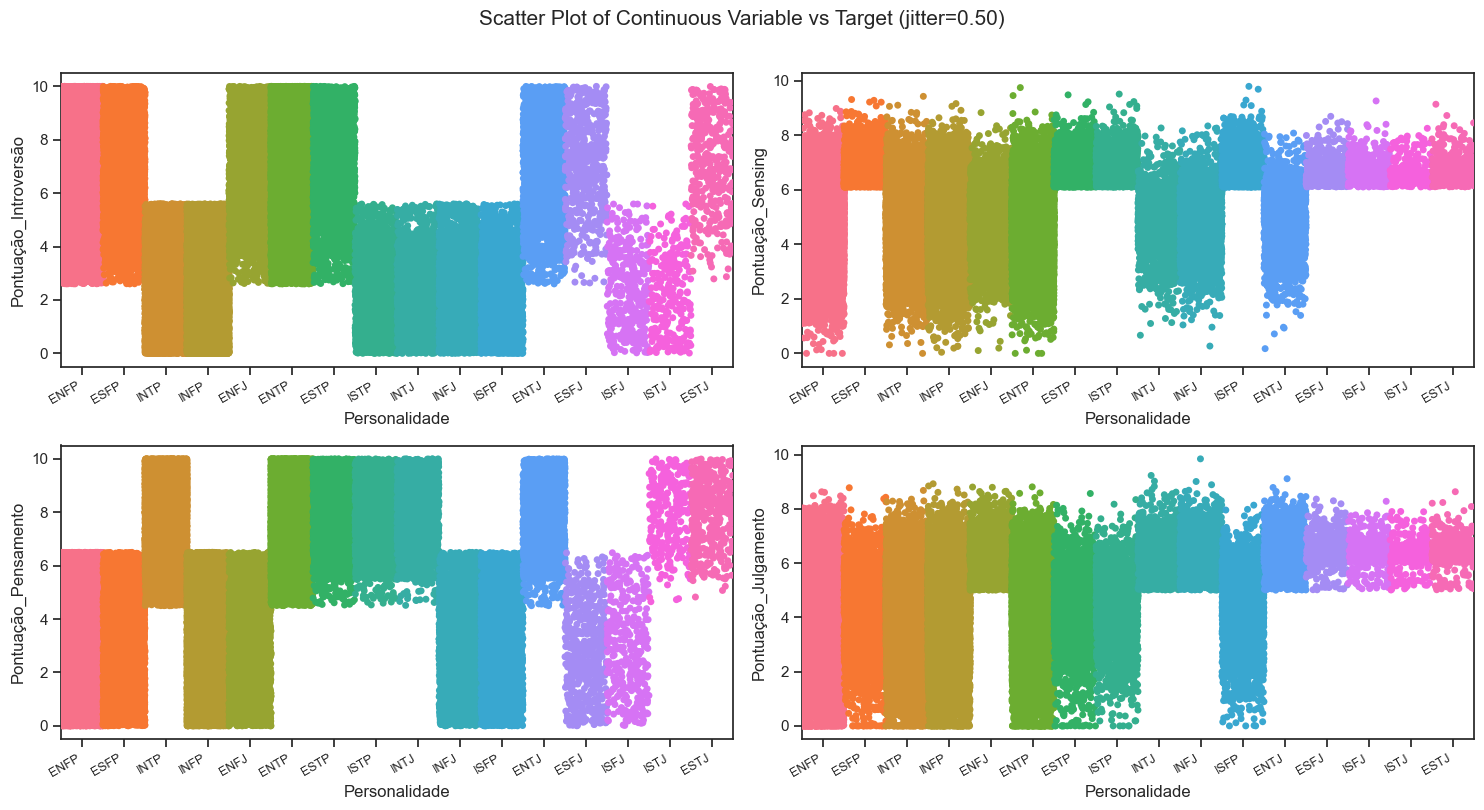

Total Number of Scatter Plots = 10


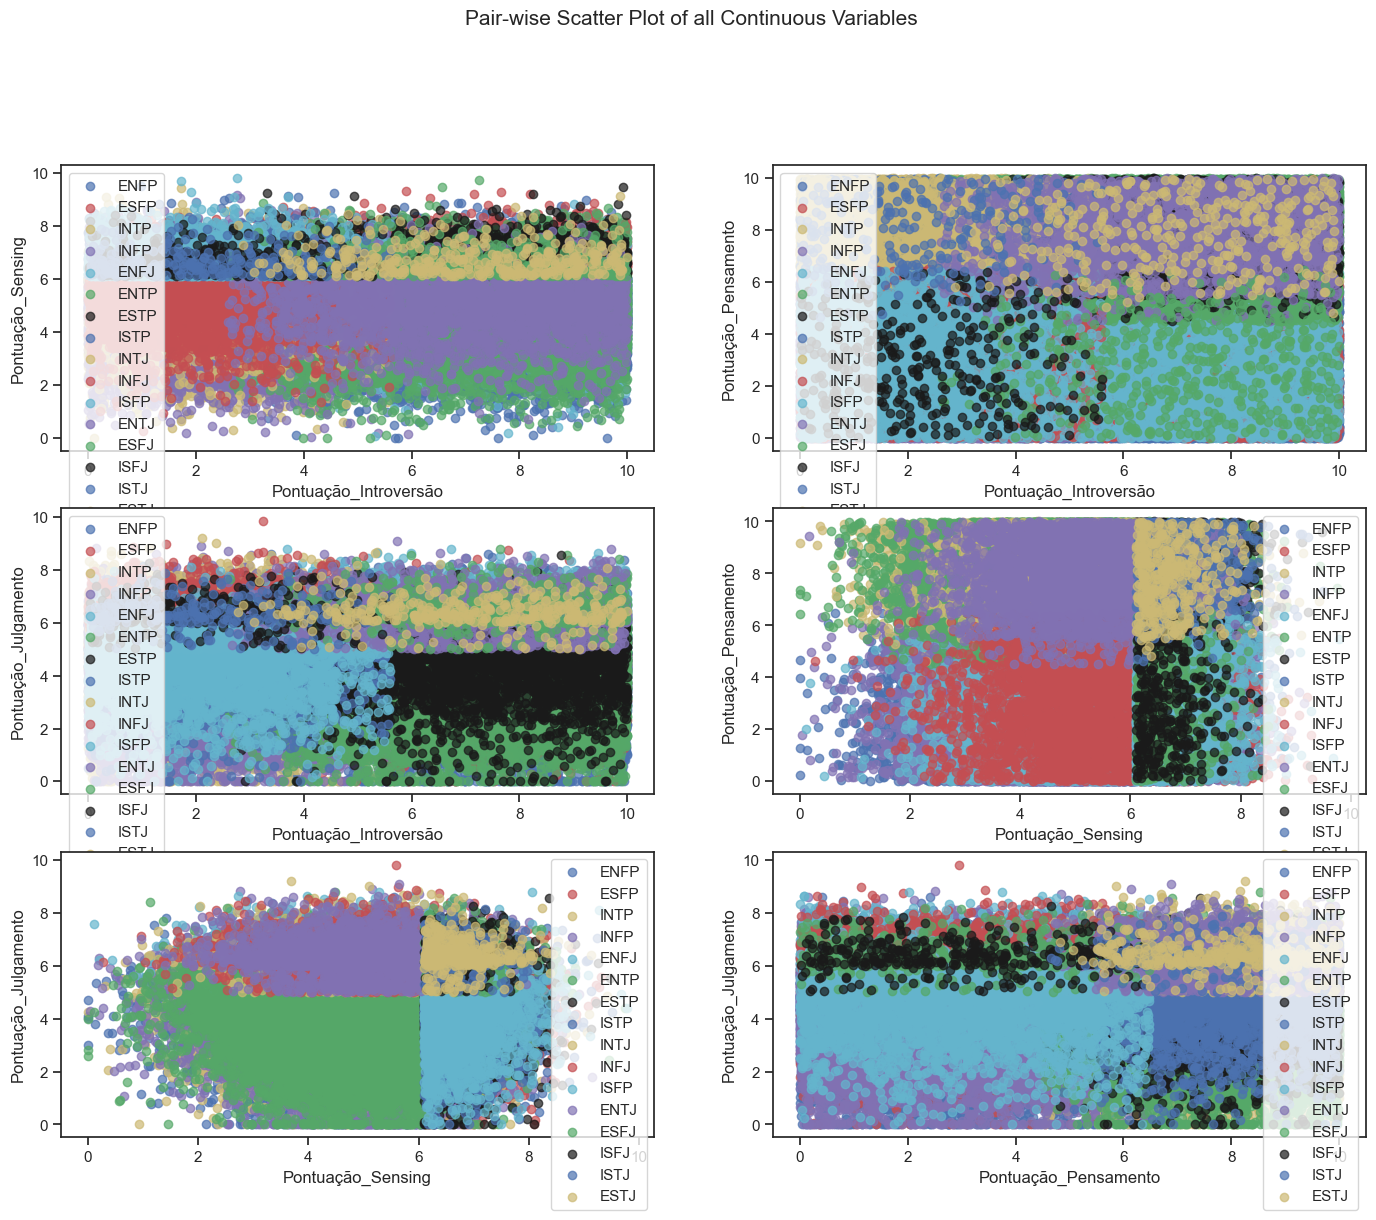

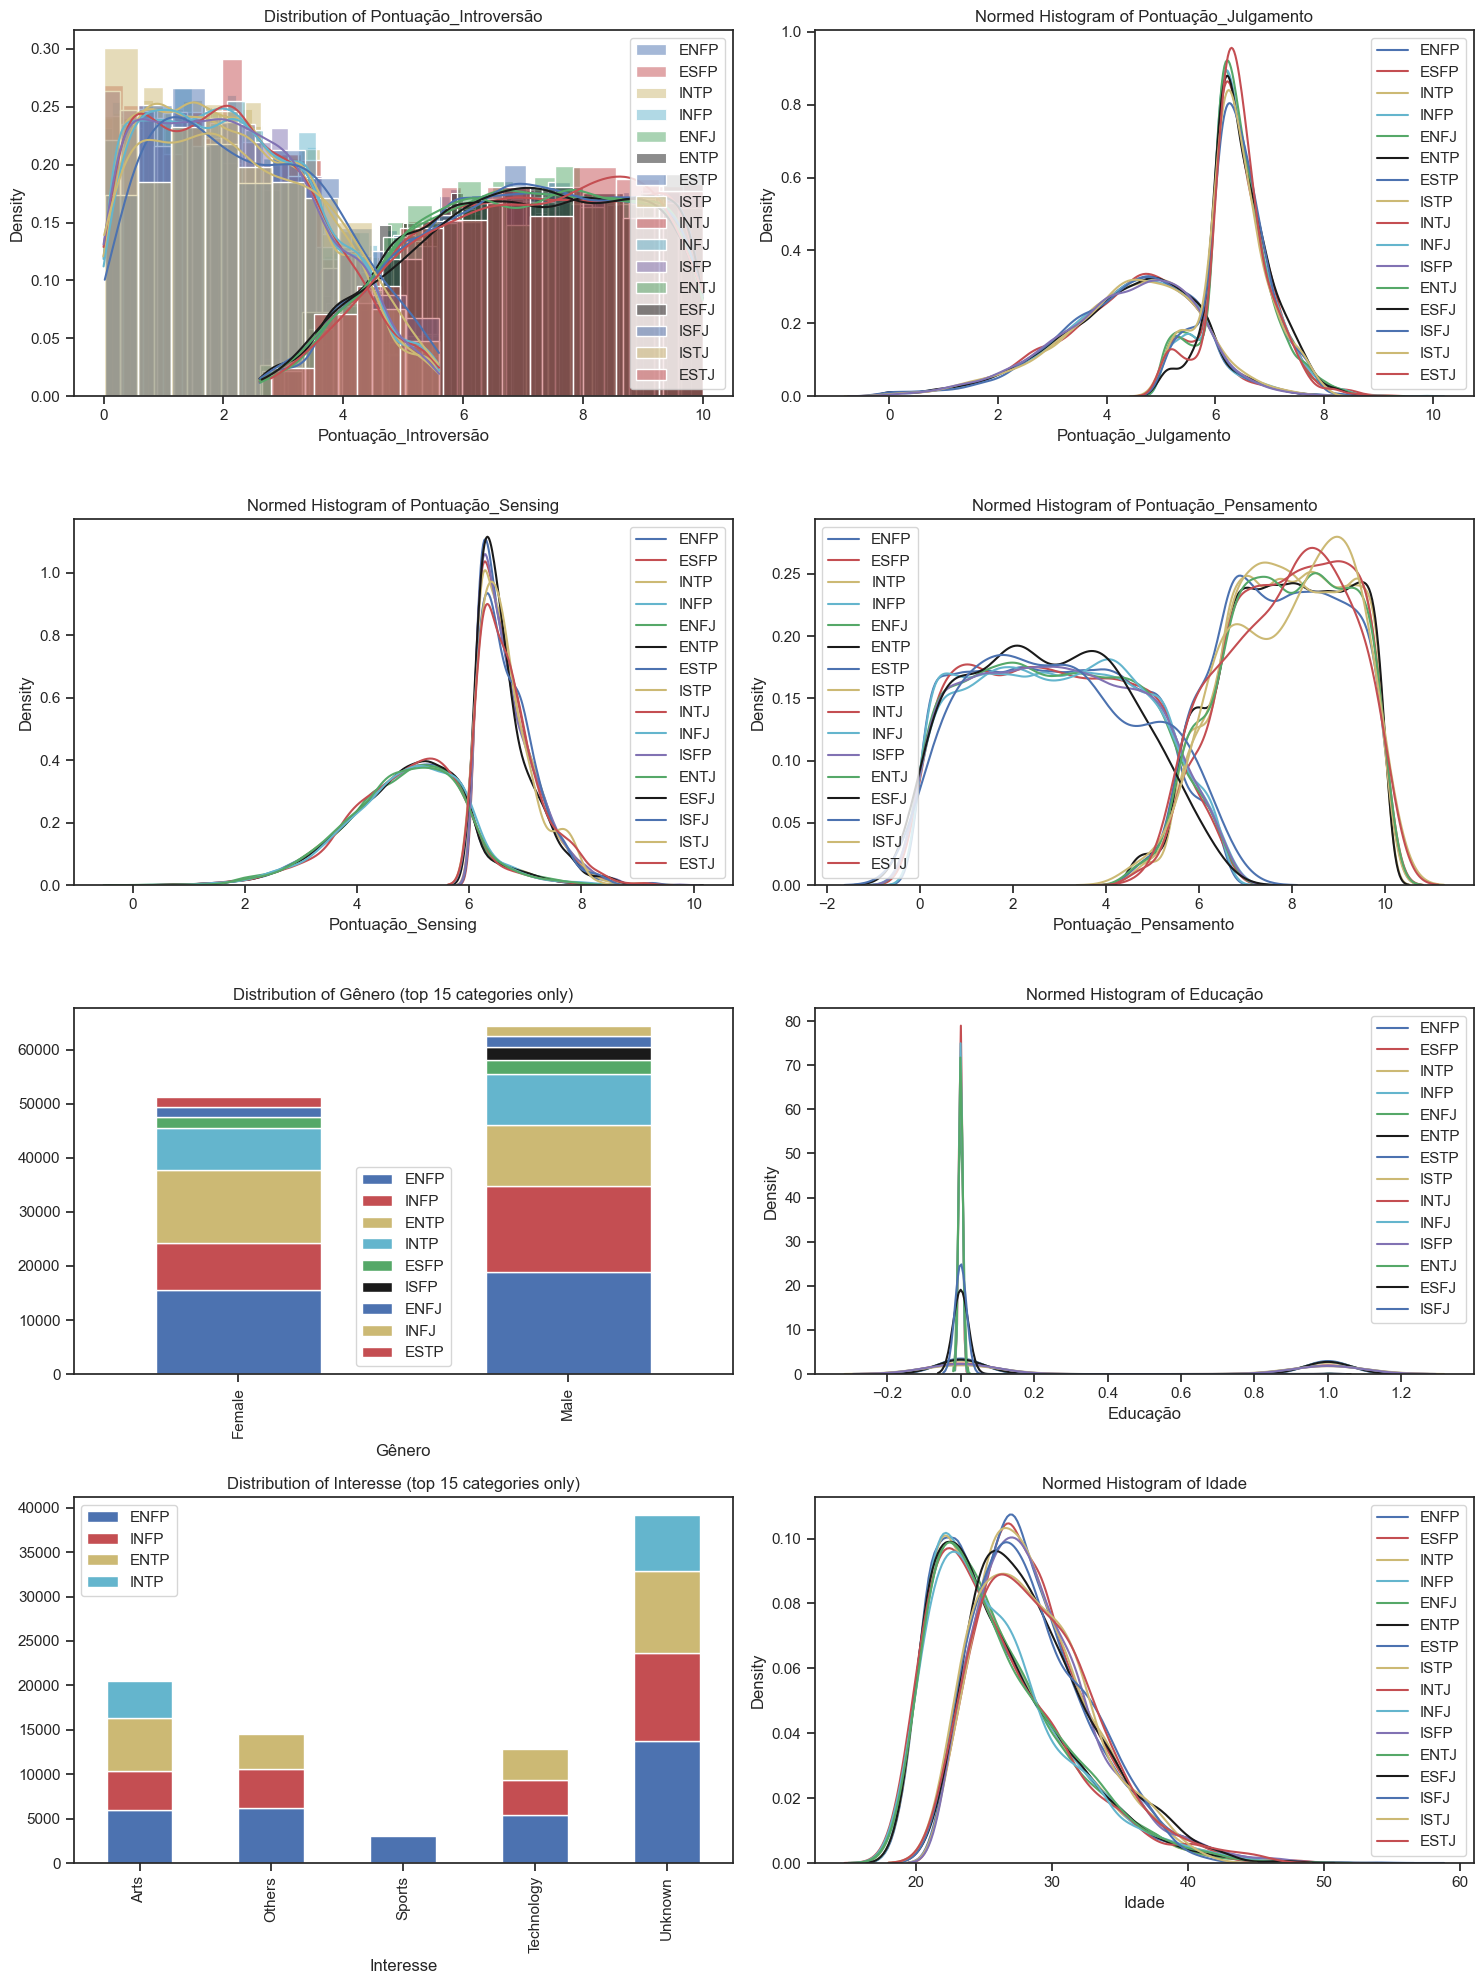

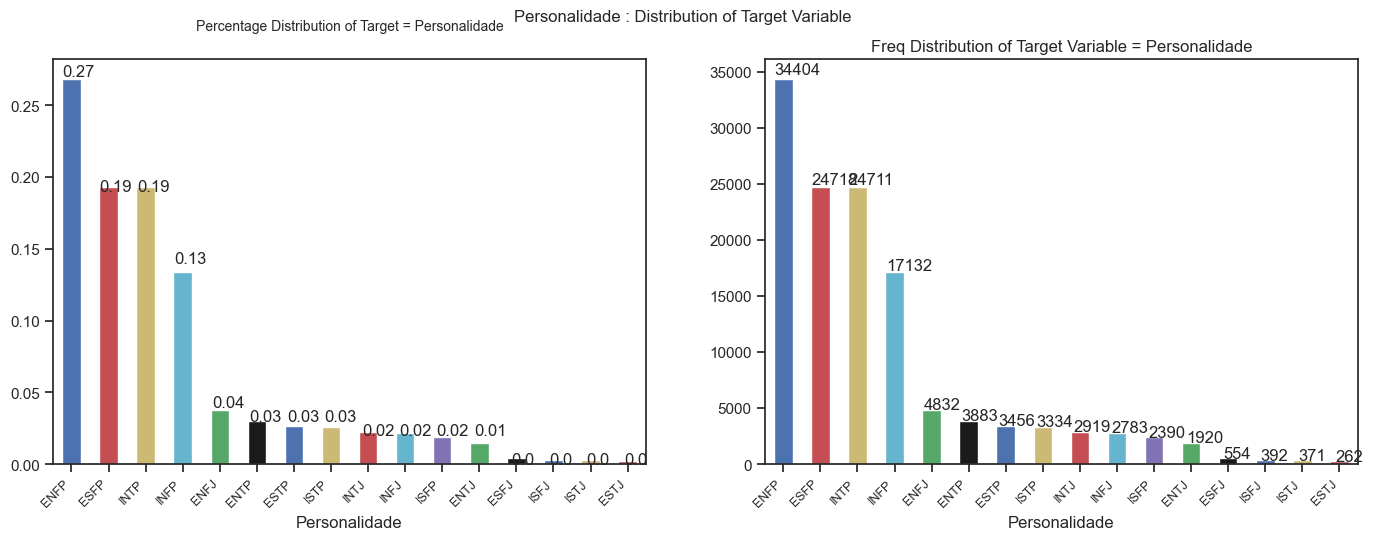

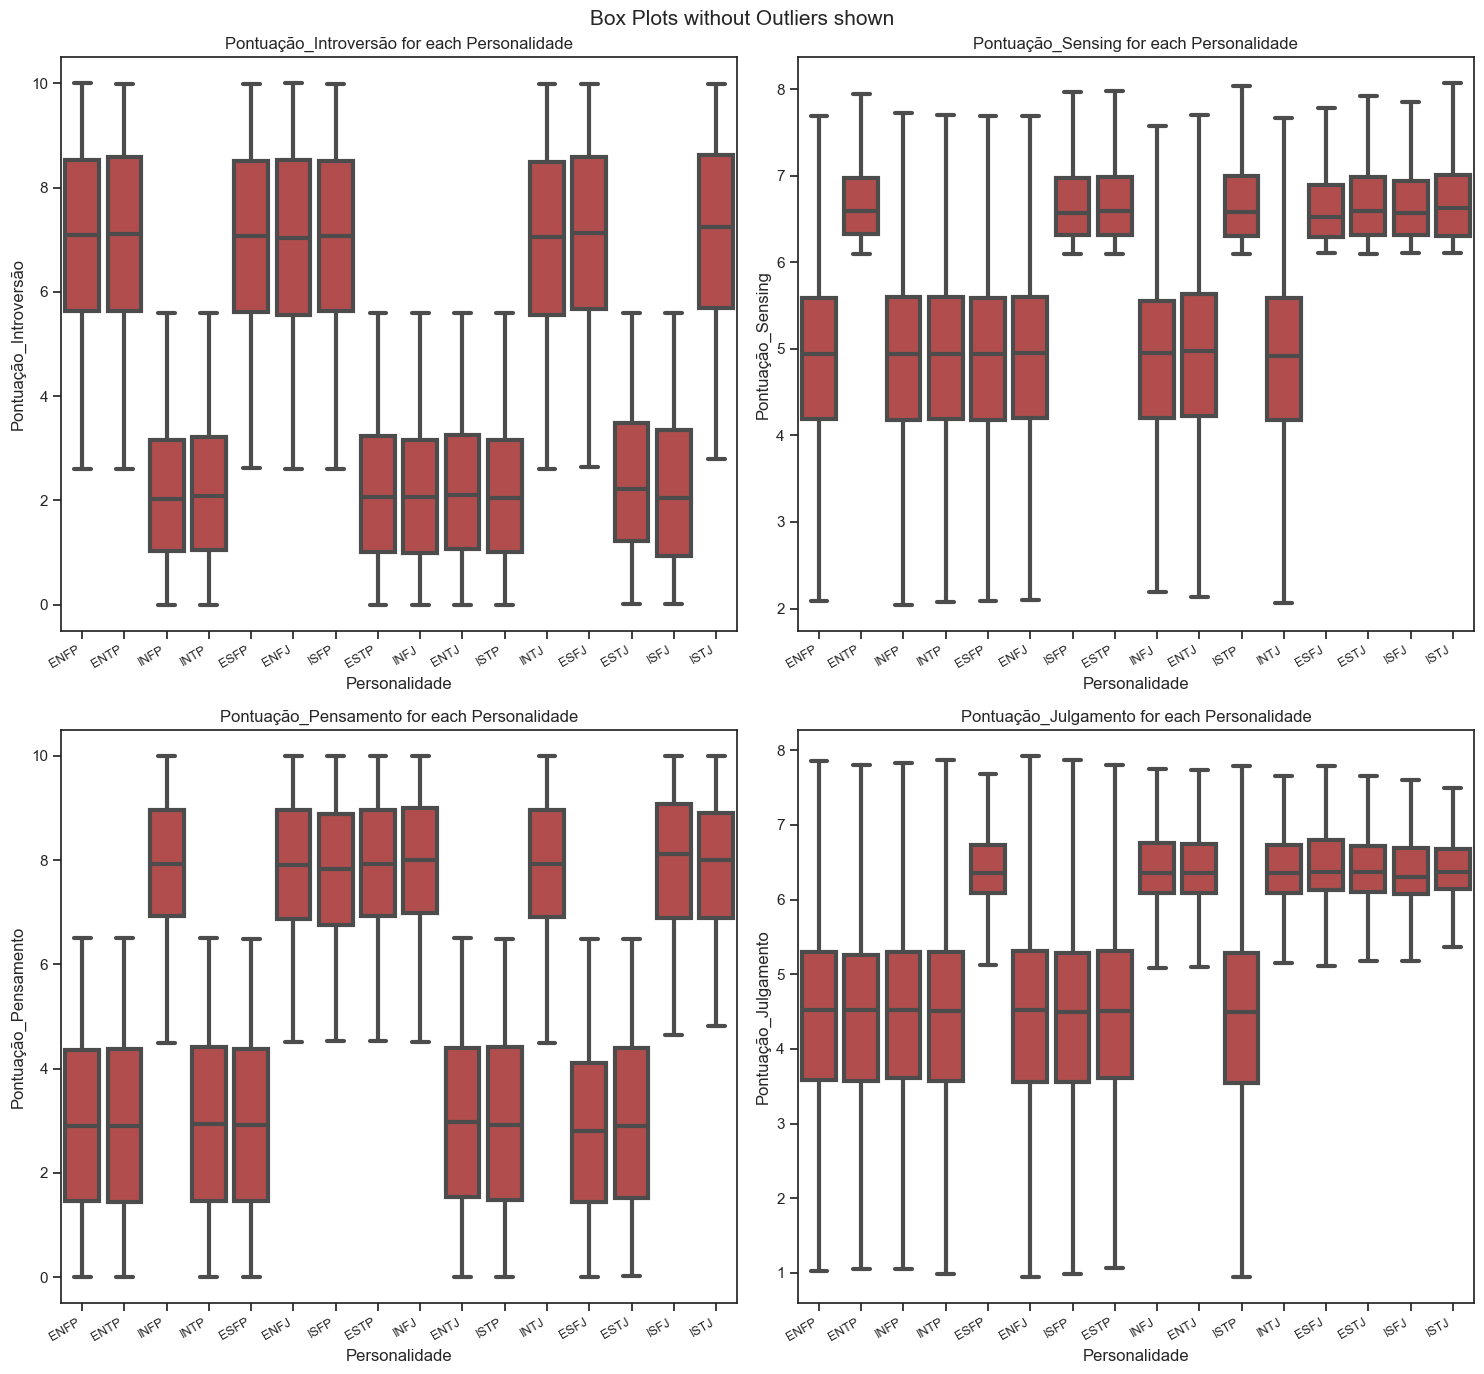

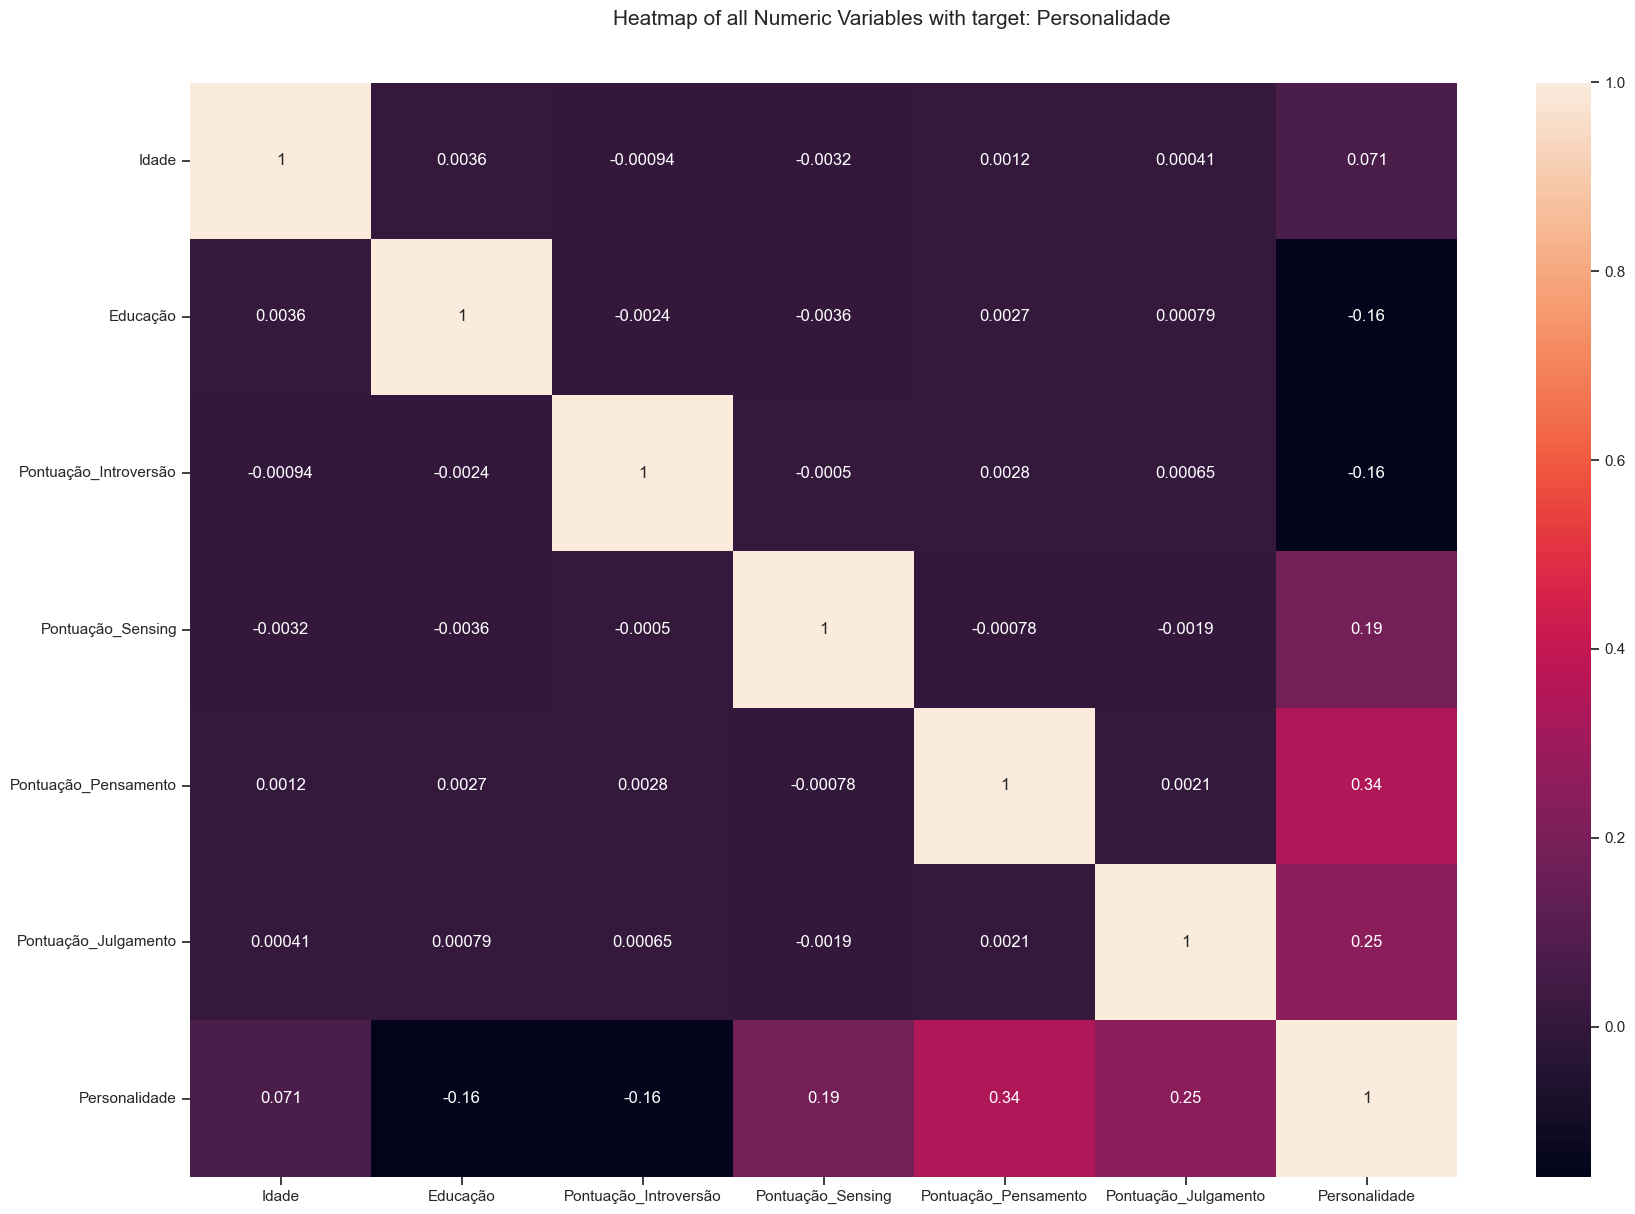

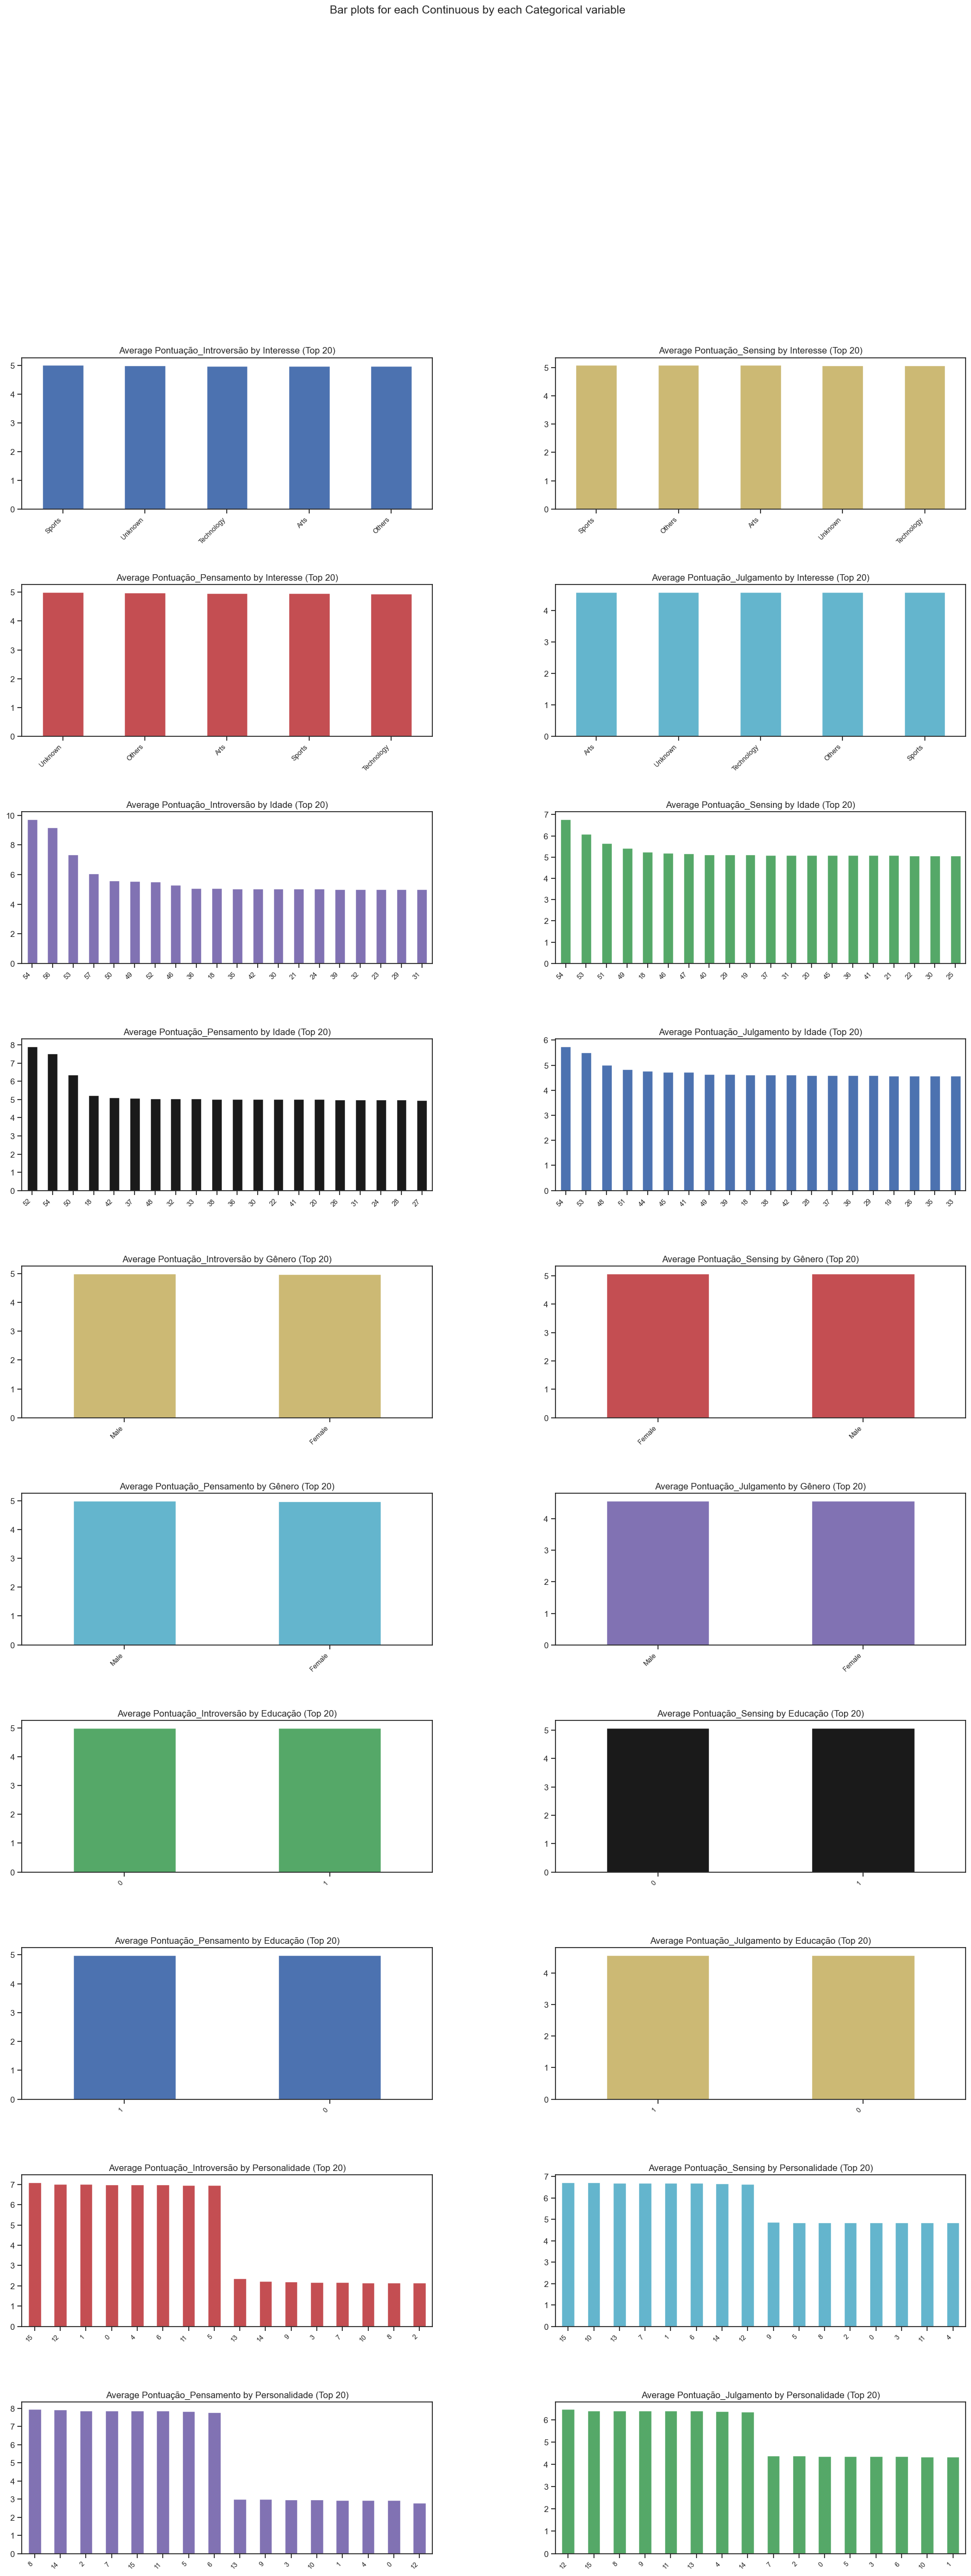

All Plots done
Time to run AutoViz = 44 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
   Idade  Gênero  Educação  Pontuação_Introversão  Pontuação_Sensing  \
0   19      Male      0            9.47080             7.141434        
1   27    Female      0            5.85392             6.160195        
2   21    Female      0            7.08615             3.388433        
3   28      Male      0            2.01892             4.823624        
4   36    Female      1            9.91703             4.755080        

   Pontuação_Pensamento  Pontuação_Julgamento  Interesse   Personalidade  
0         6.03696              4.360278           Unknown        0        
1         0.80552              4.221421            Sports        1        
2         2.66188              5.127320           Unknown        0        
3         7.30625              5.986550            Others        2        
4         5.31469              4.677213        Technology       

In [18]:
from autoviz.AutoViz_Class import AutoViz_Class

# Iniciar a classe AutoViz
AV = AutoViz_Class()

# Garantir que as visualizações sejam exibidas inline no Jupyter Notebook
%matplotlib inline

# Usar o AutoViz para visualizar o conjunto de dados
dft = AV.AutoViz(
    df, 
    depVar='Personalidade',  # Nome da variável alvo
    sep=',',  # Separe por vírgula (ajuste se necessário) a linha
    verbose=1,  # Para obter mensagens detalhadas durante a execução
    lowess=False,  # Para não aplicar suavização
    chart_format='svg',  # Formato do gráfico
    max_rows_analyzed=150000,  # Máximo de linhas a serem analisadas
    max_cols_analyzed=30,  # Máximo de colunas a serem analisadas
)

# Exibir o DataFrame resultante
print(dft.head())


# Modelagem utilizando o AutoML

## Instalação 

In [51]:
!pip install flaml
!pip install -U ipywidgets


# Descrição:

O **AutoML (Automated Machine Learning)** automatiza o processo de construção, ajuste e avaliação de modelos de machine learning. Ele ajuda a selecionar automaticamente o melhor modelo e os melhores hiperparâmetros para um determinado conjunto de dados, sem exigir um conhecimento profundo de ML. Isso permite que tanto especialistas quanto iniciantes obtenham bons resultados com menos esforço manual, otimizando o processo de modelagem e tornando-o mais eficiente.

In [146]:
# Bibliotecas
import flaml
import ipywidgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
# Codificar variáveis categóricas
df['Gênero'] = df['Gênero'].astype('category').cat.codes
df['Interesse'] = df['Interesse'].astype('category').cat.codes
df['Personalidade'] = df['Personalidade'].astype('category').cat.codes

# Separar as variáveis em recursos e alvo
X = df.drop('Personalidade', axis=1)
y = df['Personalidade']

# Dividir em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Borderline-SMOTE no conjunto de treinamento
smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Instanciar o AutoML
automl = AutoML()

In [58]:
# Configurações do AutoML
automl_settings = {
    "time_budget": 60,  # Tempo em segundos para otimização
    "metric": 'accuracy',  # Métrica a ser otimizada
    "task": 'classification',  # Tipo de tarefa
    "log_file_name": 'automl.log',  # Nome do arquivo de log
    "estimator_list": ['lgbm', 'xgboost', 'rf'],  # Lista de estimadores a serem considerados
    "verbose": 1,  # Nível de verbosidade
}

In [59]:
# Treinar o modelo
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

In [81]:

# Prevendo os resultados do conjunto de teste
y_pred = automl.predict(X_test)

# Imprimindo a acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")

# Gerando e imprimindo o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.9068441806894936
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       799
           1       0.93      0.93      0.93      6963
           2       0.92      0.91      0.92       531
           3       0.92      0.93      0.92      4989
           4       0.83      0.79      0.81       101
           5       0.84      0.85      0.84       981
           6       0.93      0.73      0.82        78
           7       0.86      0.79      0.83       633
           8       0.91      0.91      0.91       611
           9       0.91      0.91      0.91      4895
          10       0.92      0.88      0.90       362
          11       0.89      0.91      0.90      3415
          12       0.87      0.52      0.65        75
          13       0.81      0.80      0.81       670
          14       0.84      0.77      0.80        48
          15       0.83      0.79      0.81       462

    accuracy           

### Conclusão dos Resultados

A **acurácia geral** do modelo foi **0.91**, indicando que o modelo de classificação prevê corretamente aproximadamente 91% dos exemplos no conjunto de dados. 

#### Principais Métricas:
- **Precisão (precision)**: Mede a proporção de verdadeiros positivos sobre o total de exemplos classificados como positivos. O modelo apresentou precisão alta (superior a 90%) para a maioria das classes.
- **Revocação (recall)**: Mede a capacidade do modelo de identificar todos os exemplos positivos. Observamos que as classes majoritárias, como 1, 3, e 9, possuem uma alta revocação (acima de 90%), o que significa que o modelo identifica bem esses tipos de personalidades.
- **F1-Score**: É a média harmônica entre precisão e revocação. A maioria das classes tem F1-scores acima de 0.90, o que demonstra um equilíbrio entre precisão e revocação para essas classes.

#### Classes Menores:
Algumas classes de personalidades menos frequentes, como a classe 12 (com F1-score de 0.65) e classe 14 (F1-score de 0.80), apresentam desempenho inferior. Isso pode ser explicado pelo fato de serem menos representadas no conjunto de dados, tornando-as mais difíceis para o modelo aprender de maneira eficiente.

#### Conclusão Geral:
O modelo tem bom desempenho geral, com **alta precisão e revocação** para as classes principais. As técnicas de oversampling, como o Borderline-SMOTE, ajudaram a melhorar o equilíbrio de previsões para classes minoritárias. No entanto, pode-se explorar ajustes adicionais no modelo para melhorar ainda mais o desempenho em classes menos representadas.

# Validação

In [169]:
# Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

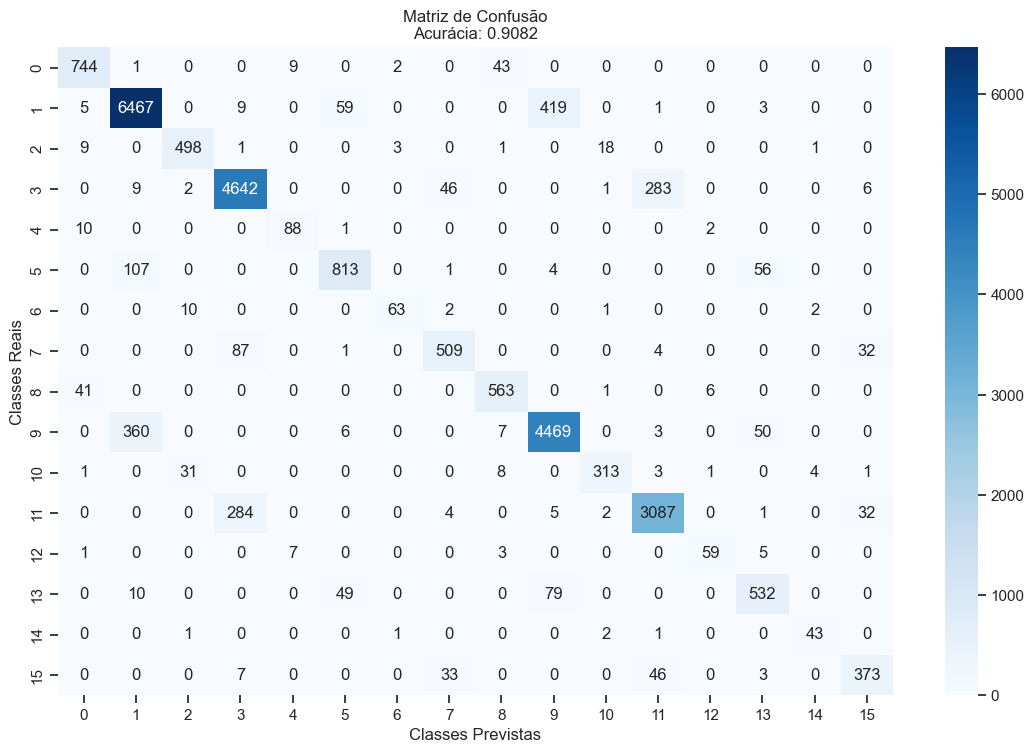

In [154]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar o gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel('Classes Previstas')
plt.ylabel('Classes Reais')
plt.title(f'Matriz de Confusão\nAcurácia: {accuracy_score(y_test, y_pred):.4f}')
plt.show()


### Conclusão dos Resultados

Os resultados mostram que o modelo atingiu uma acurácia de cerca de 90,68%, indicando uma performance sólida na classificação das classes. A matriz de confusão evidencia que o modelo é eficaz na identificação das classes mais frequentes, como a classe 1, mas apresenta desafios ao classificar classes menos representadas, como 5, 12 e 14. Isso sugere a necessidade de otimização adicional para melhorar a revocação dessas classes minoritárias.

### Importância do Borderline-SMOTE

Utilizamos o **Borderline-SMOTE** no conjunto de treinamento para abordar o desequilíbrio de classes presente nos dados. Muitas classes, como 6, 12 e 14, são raras, e essa desproporção pode prejudicar o desempenho do modelo, especialmente na revocação dessas classes. O Borderline-SMOTE gera exemplos sintéticos para as classes sub-representadas, focando nas áreas próximas às fronteiras de decisão. Essa abordagem ajuda o modelo a aprender a distinguir melhor essas classes, resultando em uma melhoria significativa na revocação das classes minoritárias.

### Código para Validação Cruzada

Para realizar a validação cruzada usando o modelo AutoML, vamos utilizar o `cross_val_score` da seguinte maneira. No entanto, observe que a biblioteca FLAML não fornece suporte direto para validação cruzada da mesma forma que os estimadores padrão do Scikit-learn. Assim, devemos treinar o modelo em cada fold manualmente ou usar o método de ajuste de `AutoML` dentro de um loop. Aqui está um exemplo de como você pode fazer isso:



In [173]:
# Bibliotecas
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [91]:
# Configurações de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in cv.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    # Instanciar e treinar o modelo
    automl = AutoML()
    automl.fit(X_train=X_train_cv, y_train=y_train_cv, **automl_settings)
    
    # Prever e calcular a acurácia
    y_pred_cv = automl.predict(X_test_cv)
    accuracy = accuracy_score(y_test_cv, y_pred_cv)
    accuracies.append(accuracy)

# Exibir resultados
print("Acurácia em cada fold:", accuracies)
print("Acurácia média:", sum(accuracies) / len(accuracies))
print("Desvio padrão da acurácia:", np.std(accuracies))



Acurácia em cada fold: [0.9055167297856557, 0.9063720131188505, 0.904458847415274, 0.9015305325628612, 0.907152897079494]
Acurácia média: 0.905006203992427
Desvio padrão da acurácia: 0.0019552111637512345


### Conclusão da Validação Cruzada

Os resultados da validação cruzada demonstram uma acurácia consistente em cada fold, variando de aproximadamente 90,15% a 90,73%. A acurácia média de **90,50%** indica que o modelo apresenta um desempenho robusto e confiável na tarefa de classificação. Além disso, o desvio padrão da acurácia, que é **0,00196**, sugere que há uma baixa variabilidade nos resultados, reforçando a estabilidade do modelo em diferentes subconjuntos dos dados.

Esses resultados de validação cruzada são encorajadores, pois indicam que o modelo é capaz de generalizar bem, o que é fundamental para sua aplicação em cenários do mundo real. A performance consistente em todos os folds sugere que o modelo é resiliente a variações nos dados de treinamento e que pode ser uma boa escolha para a classificação pretendida.

# Previsões

In [171]:
# Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Fazer previsões no conjunto de teste
y_pred = automl.predict(X_test)

# Mostrar as primeiras previsões
print("Previsões das personalidades:")
print(y_pred[:10])  # Mostrar as primeiras 10 previsões


Previsões das personalidades:
[ 1  5  1  1  3  9  3  9  7 11]


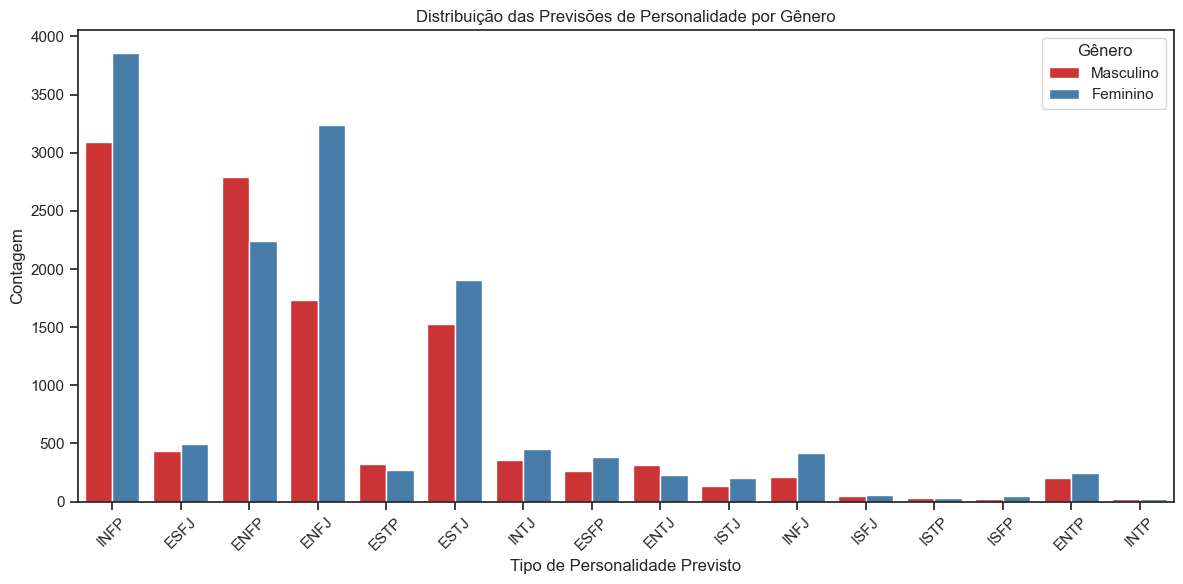

In [128]:
# Mapeando tipos MBTI (com base nas previsões)
mbti_mapping = {
    0: "INTJ", 1: "INFP", 2: "ENTJ", 3: "ENFP",
    4: "ISFJ", 5: "ESFJ", 6: "ISTP", 7: "ESTP",
    8: "INFJ", 9: "ENFJ", 10: "ISTJ", 11: "ESTJ",
    12: "ISFP", 13: "ESFP", 14: "INTP", 15: "ENTP"
}

# Convertendo as previsões em tipos MBTI
y_pred_mapped = [mbti_mapping[label] for label in y_pred]

# Criar DataFrame de previsões
df_predictions = pd.DataFrame(X_test.copy())  # Usando X_test para criar o DataFrame

df_predictions['Previsões'] = y_pred_mapped

# Usando .loc para garantir o alinhamento dos índices
df_predictions['Gênero'] = df.loc[X_test.index, 'Gênero'].values  

# plotar
plt.figure(figsize=(12, 6))
sns.countplot(data=df_predictions, x='Previsões', hue='Gênero', palette='Set1')

# Adicionando título e rótulos
plt.title('Distribuição das Previsões de Personalidade por Gênero')
plt.xlabel('Tipo de Personalidade Previsto')
plt.ylabel('Contagem')
plt.legend(title='Gênero', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrando o gráfico
plt.show()


In [131]:
# Exibindo as primeiras linhas do DataFrame com as previsões e o gênero
df_predictions[['Previsões', 'Gênero']].head(20)  

,Previsões,Gênero
33507,INFP,1
16990,ESFJ,0
91298,INFP,0
66353,INFP,1
2271,ENFP,0
16133,ENFJ,1
35054,ENFP,1
89440,ENFJ,1
59907,ESTP,1
7713,ESTJ,0


# Com base nas previsões de tipos de personalidade e os gêneros correspondentes, vamos tirar algumas conclusões e insights interessantes sobre a distribuição de personalidades entre homens (1) e mulheres (0).

### Dados analisados:
- Total de 20 previsões de personalidade
- Gênero: `1` representa homens, e `0` representa mulheres

### Distribuição dos tipos de personalidade:
**Tipos de Personalidade Previstos:**
- INFP: 5 ocorrências
- ENFP: 3 ocorrências
- ENFJ: 3 ocorrências
- ESTJ: 3 ocorrências
- ESFJ: 2 ocorrências
- INTJ: 1 ocorrência
- ESTP: 1 ocorrência
- ESFP: 1 ocorrência

### Distribuição por Gênero:
- **Homens (1):**
  - Tipos de personalidade mais comuns: INFP (2), ENFJ (2), ENFP (2), ESTJ (2)
  - Outras personalidades: ESTP (1)
  
- **Mulheres (0):**
  - Tipos de personalidade mais comuns: INFP (3), ESFJ (2)
  - Outras personalidades: ENFP (1), INTJ (1), ESFP (1), ESTJ (1)

### Insights e Análises:

1. **Predominância de INFP**: 
   - O tipo de personalidade INFP é o mais frequente com 5 ocorrências, sendo mais comum entre as mulheres (3 ocorrências). Isso pode indicar que, dentro deste subconjunto, as mulheres tendem a ser previstas como mais introvertidas, sensíveis, e idealistas, características do tipo INFP.

2. **Distribuição Homens vs Mulheres**:
   - **Homens** são predominantemente previstos como ENFJ, ENFP e ESTJ, personalidades geralmente associadas a extroversão, habilidades sociais e liderança.
   - **Mulheres**, além de INFP, têm uma forte presença de ESFJ, um tipo conhecido por seu senso de dever e apoio aos outros, sugerindo características mais empáticas e cooperativas.

3. **Extroversão entre os Homens**:
   - Entre os homens, vemos uma prevalência de personalidades mais extrovertidas como ENFP, ENFJ, ESTP, e ESTJ. Isso pode sugerir que, no grupo analisado, os homens têm uma tendência maior à extroversão e à tomada de decisão lógica e estruturada.

4. **Diversidade de Personalidades nas Mulheres**:
   - As mulheres apresentam uma diversidade maior de personalidades mais voltadas para a introversão e sensibilidade (INFP, ESFJ), com algumas também tendo características extrovertidas e assertivas, como INTJ e ESTJ, ainda que em menor proporção.

### Conclusão Geral:
As previsões sugerem que, nesse subconjunto de dados, os homens estão mais associados a personalidades extrovertidas e orientadas para liderança (ENFJ, ENFP, ESTJ), enquanto as mulheres têm uma tendência mais forte para introversão, sensibilidade e apoio aos outros (INFP, ESFJ). A diversidade de personalidades entre mulheres, incluindo tipos como INTJ, também indica que características de planejamento lógico e independência estão presentes, ainda que em menor frequência.

